<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analysing and predict house prices in King County, United States.

## Description

This project was part of "Data Analysis Using Python" and I was tasked to determine the market price of a house given a set of features such as square footage, number of bedrooms, number of floors etc. The dataset contains house sale prices for King County and was taken from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01).

## 1. Import the data and all the libraries

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split


In [83]:
#check the data types we're going to work with
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(url)
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 2. Data Wrangling

In [58]:
#as we can see above, the Id and Unnamed: 0 are not needed so we remove the columms, then we get a statistical summary of the data
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 2.1 Identify and handle missing values in our table

In [60]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [65]:
#replace the NAN of each column with the mean values
bed_mean=df['bedrooms'].mean()
bath_mean=df['bathrooms'].mean()
df['bedrooms'].replace(np.nan,bed_mean, inplace=True)
df['bathrooms'].replace(np.nan,bath_mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## 3. Exploratory data analysis

In [55]:
#next step will be to count the number of houses with unique floor values
df_unique = df["floors"].value_counts().to_frame()
df_unique.head(10)

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


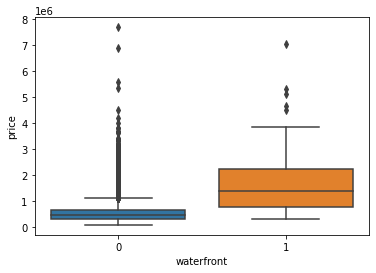

In [28]:
#boxplot the distribution of price between the houses with or without waterfront view. 
#This will enable us to see which houses have more price outliers.
sns.boxplot(x = "waterfront", y = "price", data = df)

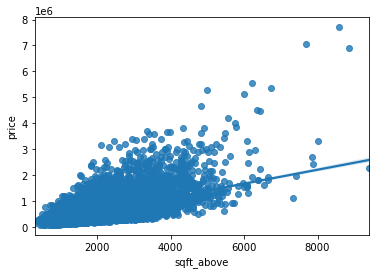

In [68]:
#as we can see the price is positively correlated with the sqft_above variable
sns.regplot(x="sqft_above", y="price", data=df)


In [67]:
#now we can find the price correlation for each variable
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## 4. Model development

In [30]:
#we fit the Linear Regression model using the variable sqft_living and calculate R^2
x = df[["sqft_living"]]
y = df["price"]
lm = LinearRegression()

In [71]:
lm.fit(x,y)
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4928532179037931


In [72]:
#next step is to fit the Linear Regression model to predict the price using a list of features
features_list = ["floors", "waterfront", "lat", "bedrooms", 
           "sqft_basement", "view", "bathrooms", "sqft_living15", 
           "sqft_above", "grade", "sqft_living"]
X = df[features_list]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6576958241268556


In [93]:
#then we create a list of tuples with the estimator and model constructor
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

#create & fit the pipeline object to predict the price, then fit the model and calculate the R^2 
pipe=Pipeline(Input)
pipe
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

pipe.fit(X,Y)
pipe.score(X,Y)

0.7513411654918181

## 5. Model evaluation and refinement

In [94]:
#we're going to split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3242
number of training samples: 18371


In [96]:
#Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1.
#Then we calculate the R^2 using the test data.
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.6478759163939117

In [97]:
#Lastly, we perform a second order polynomial transform on both the training data and testing data, 
#Then we create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.700274428968126